![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, ©  Carlos A. Iglesias

## [Introduction to Machine Learning II](3_0_0_Intro_ML_2.ipynb)

# Exercise - The Titanic Dataset

In this exercise we are going to put in practice what we have learnt in the notebooks of the session. 

Answer directly in your copy of the exercise and submit it as a moodle task.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline

# Reading Data

Assign the variable *df* a Dataframe with the Titanic Dataset from the URL https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"

Print *df*.

In [2]:
url = 'https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv'
df = pd.read_csv(url, header = 0)
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# Munging and Exploratory visualisation

Obtain number of passengers and features of the dataset

In [3]:
df.shape


(891, 12)

Obtain general statistics (count, mean, std, min, max, 25%, 50%, 75%) about the column Age

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Obtain the median of the age of the passengers

In [5]:
df['Age'].median()


28.0

Obtain number of missing values per feature

In [6]:
[df[column].isnull().sum() for column in df.columns]


[0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]

How many passsengers have survived? List them grouped by Sex and Pclass.

Assign the result to a variable df_1 and print it

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_1 = df.groupby(['Sex', 'Pclass']).agg({'Survived': np.sum})
print(df_1)

               Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47


Visualise df_1 as an histogram.

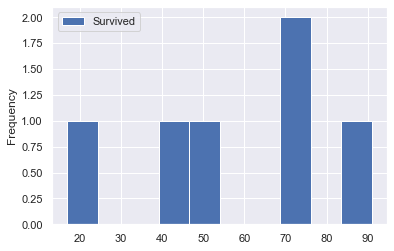

In [11]:
df_1.plot(kind = 'hist')

# Feature Engineering

Here you can find some features that have been proposed for this dataset. Your task is to analyse them and provide some insights. 

Use pandas and visualisation to justify your conclusions

## Feature FamilySize 

Regarding SbSp and Parch, we can define a new feature, 'FamilySize' that is the combination of both.

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
df.groupby('FamilySize').size()

FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
dtype: int64

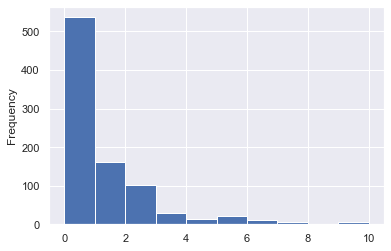

In [26]:
df['FamilySize'].plot(kind = 'hist')

## Feature Alone

It seems many people who went alone survived. We can define a new feature 'Alone'

In [13]:
df['Alone'] = (df.FamilySize == 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


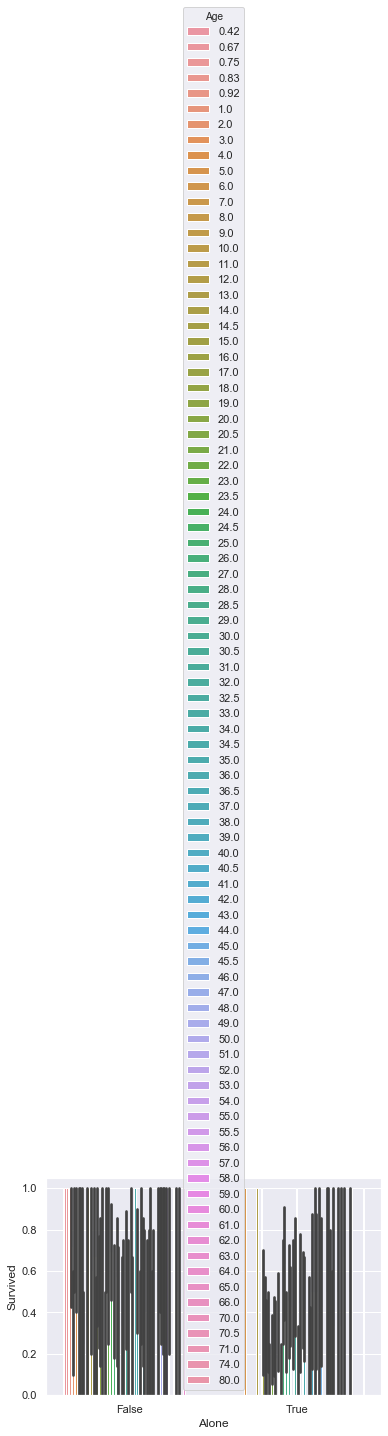

In [33]:
sns.barplot(x="Alone", y='Survived', hue='Age', data=df)

In [31]:
df.groupby('Age').size()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64

In [32]:
df.groupby(['Alone']).agg({'Survived': np.mean})

,Survived
Alone,
False,0.505650
True,0.303538


## Feature Salutation

If we observe well in the name variable, there is a 'title' (Mr., Miss., Mrs.). We can add a feature wit this title.

In [14]:
#Taken from http://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

df['Salutation'] = df['Name'].apply(name_extract)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Mr


We can list the different salutations.

In [15]:
df['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [16]:
df.groupby(['Salutation']).size()

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

There only 4 main salutations, so we combine the rest of salutations in 'Others'.

In [17]:
def group_salutation(old_salutation):
    if old_salutation == 'Mr':
        return('Mr')
    else:
        if old_salutation == 'Mrs':
            return('Mrs')
        else:
            if old_salutation == 'Master':
                return('Master')
            else: 
                if old_salutation == 'Miss':
                    return('Miss')
                else:
                    return('Others')
df['Salutation'] = df['Salutation'].apply(group_salutation)
df.groupby(['Salutation']).size()

Salutation
Master     40
Miss      182
Mr        517
Mrs       125
Others     27
dtype: int64

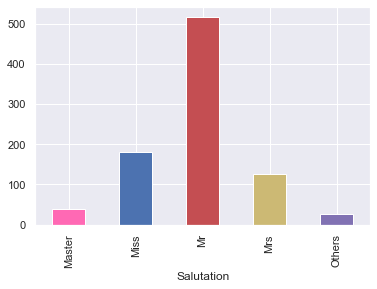

In [18]:
# Distribution
colors_sex = ['#ff69b4', 'b', 'r', 'y', 'm', 'c']
df.groupby('Salutation').size().plot(kind='bar', color=colors_sex)

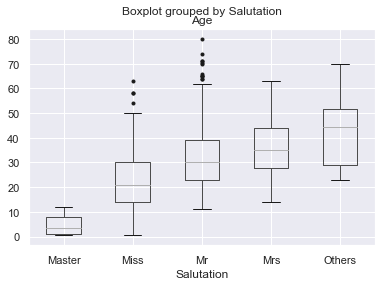

In [19]:
df.boxplot(column='Age', by = 'Salutation', sym='k.')

In [34]:
df.groupby(['Salutation']).agg({'Survived': np.mean})

,Survived
Salutation,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Others,0.444444


## Features Children and Female

In [20]:
# Specific features for Children and Female since there are more survivors
df['Children']   = df['Age'].map(lambda x: 1 if x < 6.0 else 0)
df['Female']     = df['Sex'].map(lambda x: 1 if x == "female" else 0)

In [35]:
df.groupby(['Children']).agg({'Survived': np.mean})

,Survived
Children,
0,0.367178
1,0.704545


In [36]:
df.groupby(['Female']).agg({'Survived': np.mean})

,Survived
Female,
0,0.188908
1,0.742038


## Feature AgeGroup

In [22]:
# Group ages to simplify machine learning algorithms.  0: 0-5, 1: 6-10, 2: 11-15, 3: 16-59 and 4: 60-80
df['AgeGroup'] = 0
df.loc[(df.Age<6),'AgeGroup'] = 0
df.loc[(df.Age>=6) & (df.Age < 11),'AgeGroup'] = 1
df.loc[(df.Age>=11) & (df.Age < 16),'AgeGroup'] = 2
df.loc[(df.Age>=16) & (df.Age < 60),'AgeGroup'] = 3
df.loc[(df.Age>=60),'AgeGroup'] = 4

In [37]:
df.groupby(['AgeGroup']).agg({'Survived': np.mean})

,Survived
AgeGroup,
0,0.375566
1,0.350000
2,0.578947
3,0.386777
4,0.269231


## Feature Deck
Only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck.

In [23]:
def substrings_in_string(big_string, substrings):
    if type(big_string) == float:
        if np.isnan(big_string):
            return 'X'
    for substring in substrings:
        if big_string.find(substring) != 1:
            return substring
    print(big_string)
    return 'X'
 
#Turning cabin number into Deck
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [38]:
df.groupby(['Deck']).agg({'Survived': np.mean})

,Survived
Deck,
A,0.666667
X,0.299854


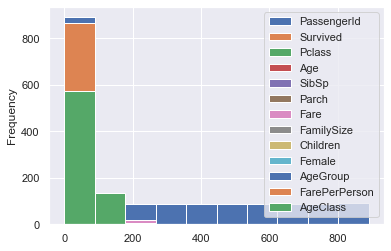

In [43]:
df.plot(kind = 'hist')

## Feature FarePerPerson

This feature is created from two previous features: Fare and FamilySize.

In [24]:
df['FarePerPerson']= df['Fare'] / (df['FamilySize'] + 1)

In [39]:
df.groupby(['FarePerPerson']).agg({'Survived': np.mean})

,Survived
FarePerPerson,
0.000000,0.066667
1.132143,1.000000
2.409733,0.000000
2.583333,0.000000
2.618067,0.000000
...,...
211.337500,1.000000
221.779200,0.000000
227.525000,0.666667


## Feature AgeClass

Since age and class are both numbers we can just multiply them and get a new feature.


In [25]:
df['AgeClass']=df['Age']*df['Pclass']

In [40]:
df.groupby(['AgeClass']).agg({'Survived': np.mean})

,Survived
AgeClass,
0.92,1.000000
1.26,1.000000
1.34,1.000000
1.66,1.000000
2.00,0.666667
...,...
183.00,0.000000
189.00,1.000000
195.00,0.000000


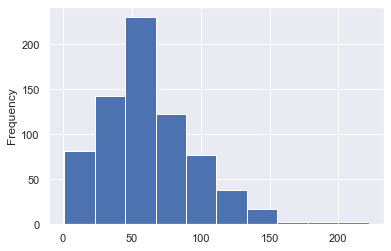

In [41]:
df['AgeClass'].plot(kind = 'hist')

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

©  Carlos A. Iglesias, Universidad Politécnica de Madrid.